In [65]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader.data as data
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:


import yfinance as yf
import datetime as dt
stock = 'AAPL'
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 6, 1)
df=yf.download(stock, start, end)


/var/folders/dr/cxsl4k553zl9gf8lz75dpcym0000gn/T/ipykernel_31827/1461907665.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
df.shape

(6391, 5)

In [6]:
df.head(4)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.841048,0.845274,0.764034,0.787983,535796800
2000-01-04,0.770139,0.831186,0.760277,0.813341,512377600
2000-01-05,0.781409,0.830717,0.773896,0.779530,778321600
2000-01-06,0.713787,0.803949,0.713787,0.797375,767972800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6391 entries, 2000-01-03 to 2025-05-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6391 non-null   float64
 1   (High, AAPL)    6391 non-null   float64
 2   (Low, AAPL)     6391 non-null   float64
 3   (Open, AAPL)    6391 non-null   float64
 4   (Volume, AAPL)  6391 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 299.6 KB


In [8]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,6391.000000,6391.000000,6391.000000,6391.000000,6.391000e+03
mean,44.037185,44.481227,43.545908,43.999671,3.806965e+08
std,63.687457,64.316229,62.974942,63.615603,3.828772e+08
min,0.197156,0.198208,0.191145,0.195202,2.323470e+07
25%,2.045037,2.081703,2.018139,2.050597,1.117776e+08
50%,14.829335,14.975292,14.656609,14.771329,2.605568e+08
75%,46.630159,47.066034,46.206062,46.665381,5.104232e+08
max,258.396667,259.474086,257.010028,257.568678,7.421641e+09


In [10]:

%matplotlib inline


<Figure size 1500x500 with 0 Axes>

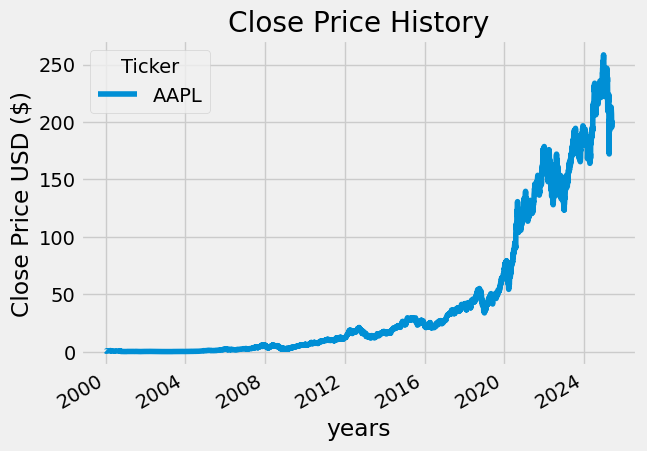

In [11]:
plt.figure(figsize=(15,5))
df['Close'].plot()
plt.title('Close Price History')
plt.xlabel('years')
plt.ylabel('Close Price USD ($)')
plt.show()

In [12]:
def plt_graph(figsize, values , column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.title(f"({column_name}) Stock Price")
    plt.xlabel('year')
    plt.ylabel(column_name)
    plt.show()

In [13]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

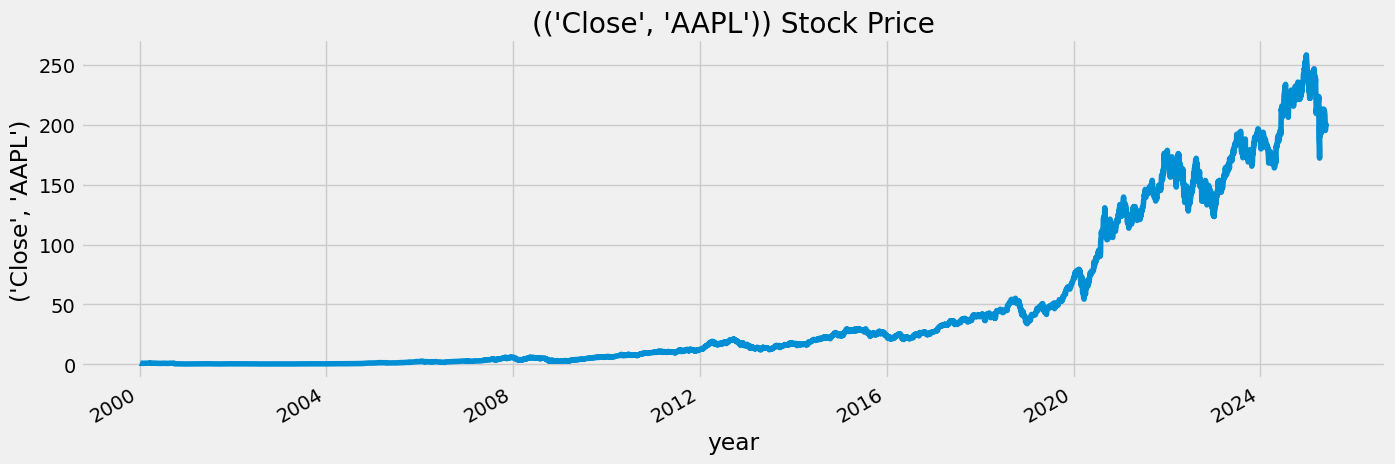

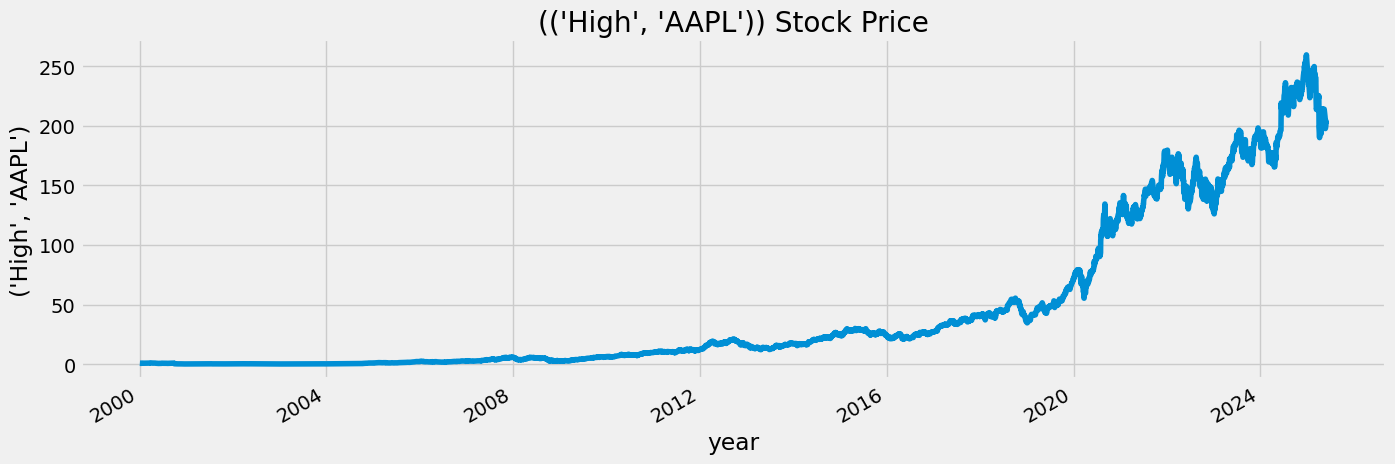

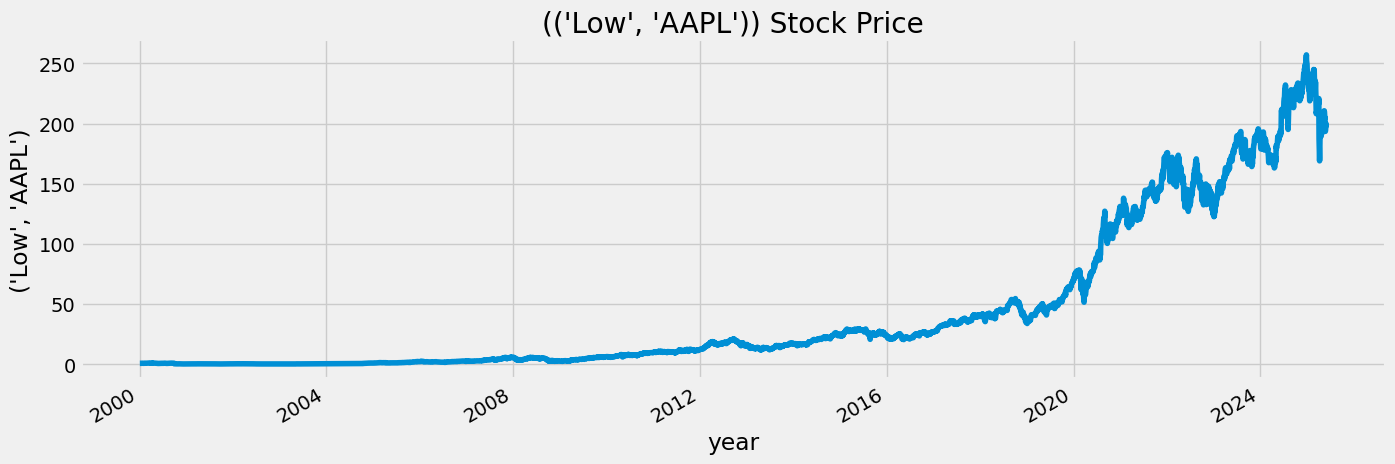

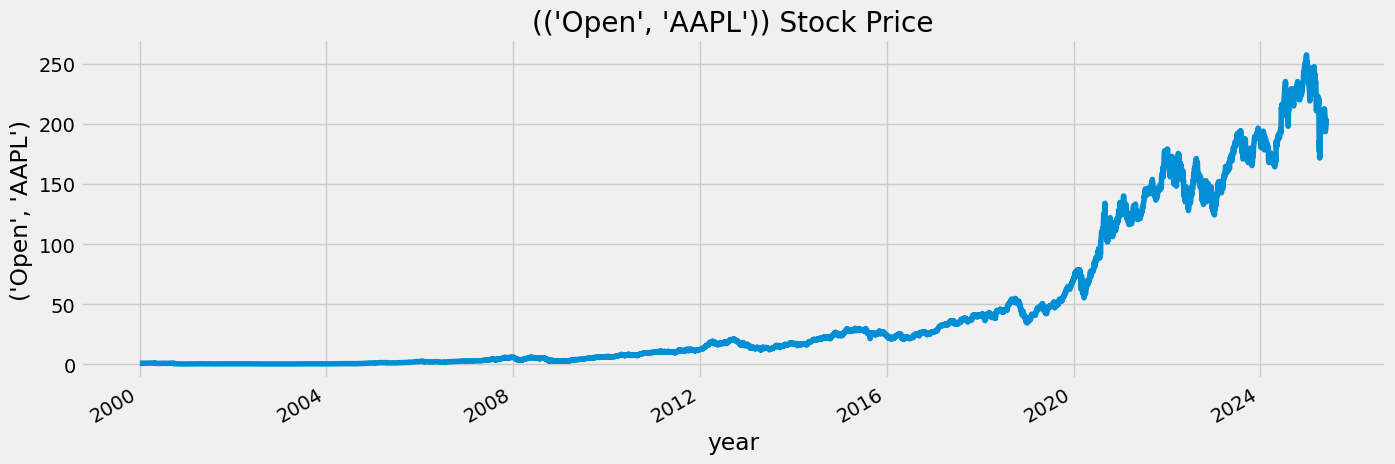

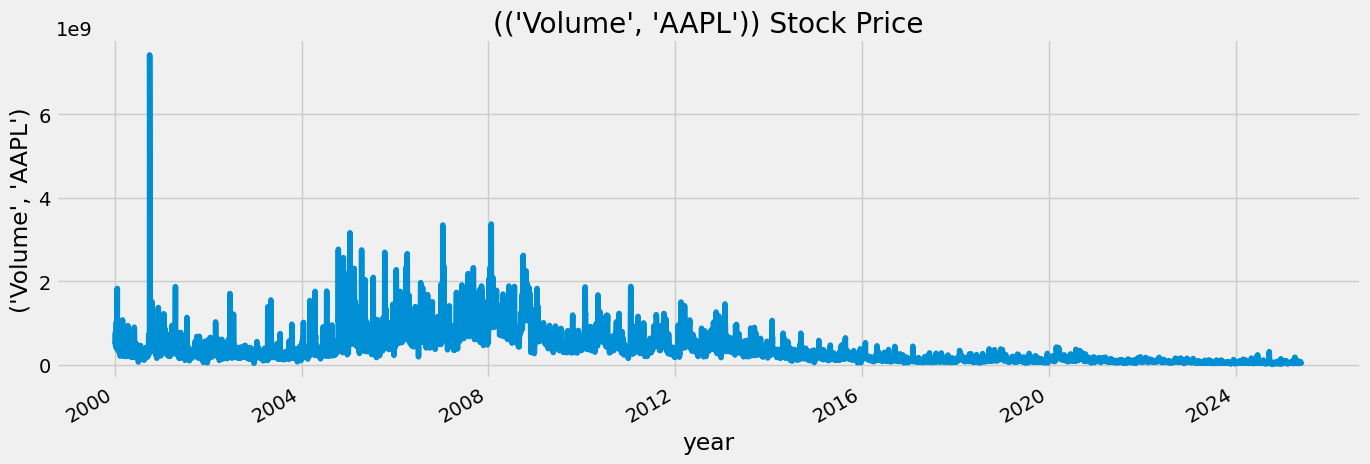

In [14]:
for column in df.columns:
    plt_graph((15,5), df[column], column)

In [15]:
for i in range (2000, 2025):
    print(i,list(df.index.year).count(i))

2000 252
2001 248
2002 252
2003 252
2004 252
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [16]:
df["MA_for_200_days"] = df["Close"].rolling(window=250).mean()
df["MA_for_150_days"] = df["Close"].rolling(window=50).mean()
df["MA_for_150_days"]

Date
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
                 ...    
2025-05-23    206.263889
2025-05-27    206.003881
2025-05-28    205.737886
2025-05-29    205.488657
2025-05-30    205.206494
Name: MA_for_150_days, Length: 6391, dtype: float64

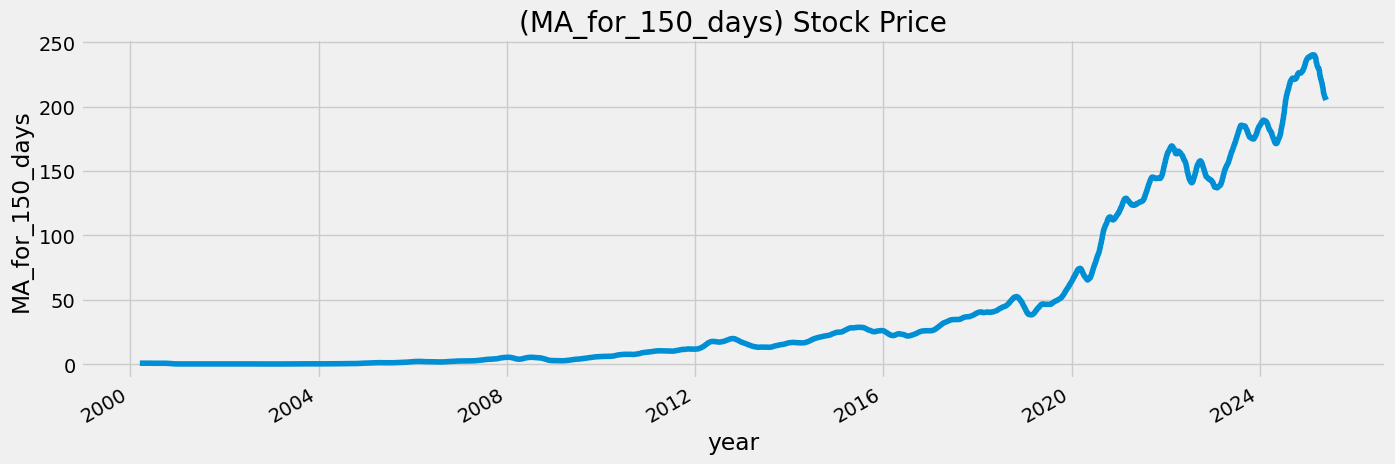

In [17]:
plt_graph((15,5), df["MA_for_150_days"], "MA_for_150_days")

<Figure size 640x480 with 0 Axes>

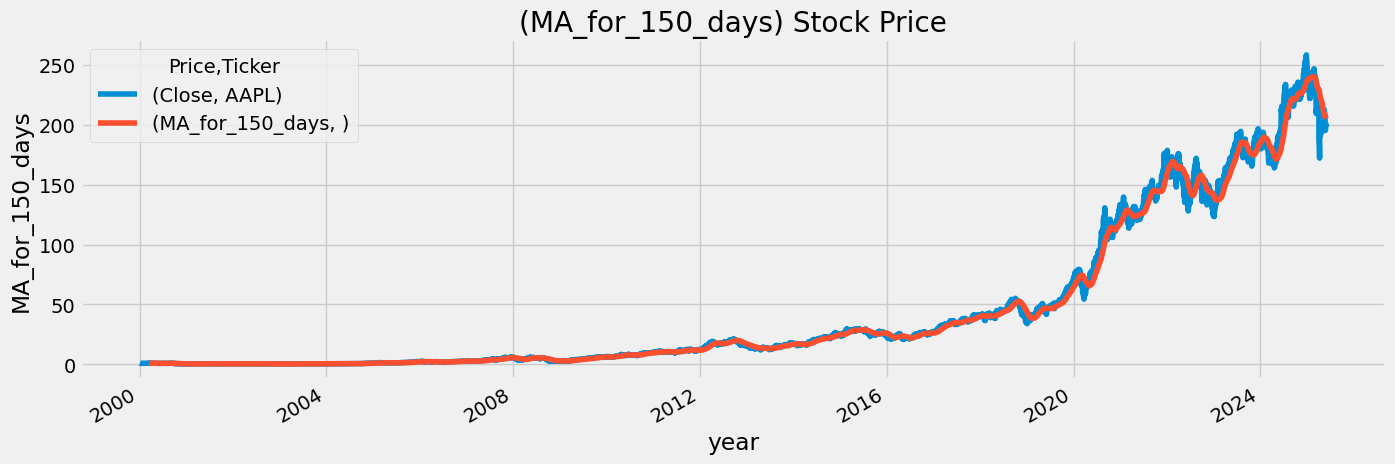

In [18]:
plt_graph((15,5), df[['Close', 'MA_for_150_days']], "MA_for_150_days")


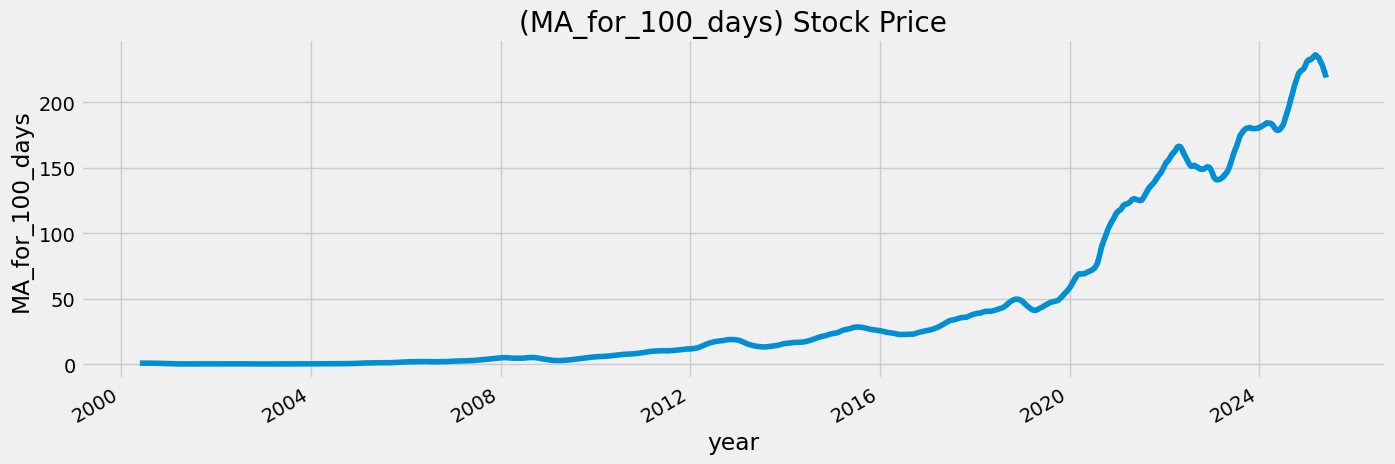

In [19]:
df["MA_for_100_days"] = df["Close"].rolling(window=100).mean()
plt_graph((15,5), df["MA_for_100_days"], "MA_for_100_days")

<Figure size 640x480 with 0 Axes>

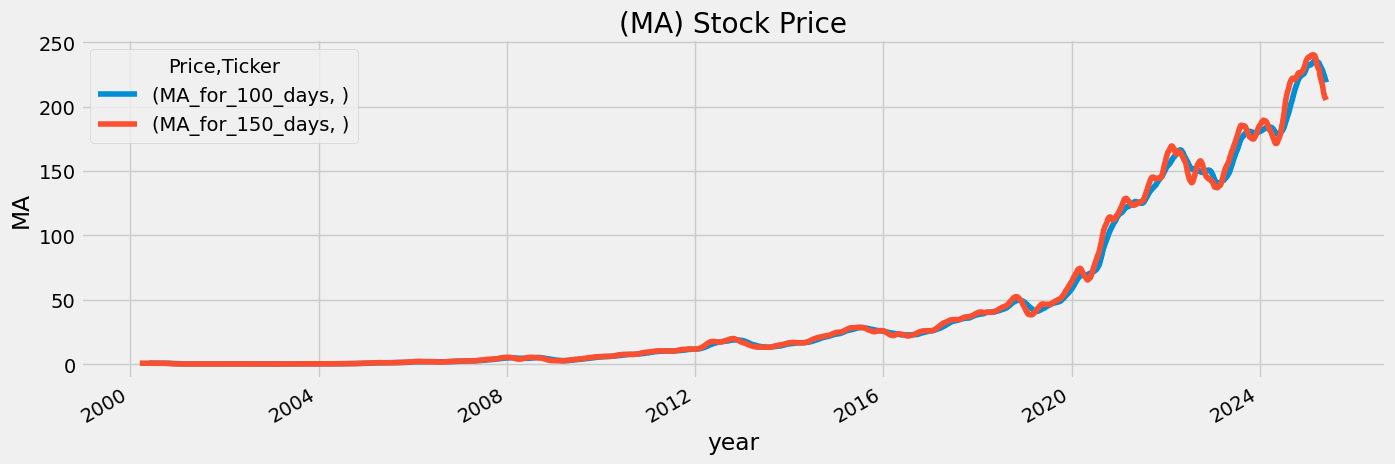

In [20]:
plt_graph((15, 5), df[["MA_for_100_days", "MA_for_150_days"]], "MA")

In [23]:
Close = df["Close"]


In [24]:
max(Close.values), min(Close.values)

(array([258.39666748]), array([0.19715564]))

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close.values)
scaled_data


array([[0.00249378],
       [0.00221915],
       [0.0022628 ],
       ...,
       [0.77545787],
       [0.77363756],
       [0.77712328]])

In [26]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i, 0])
    y_data.append(scaled_data[i])

    import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [27]:
x_data[0], y_data[0]

(array([0.00249378, 0.00221915, 0.0022628 , 0.0020009 , 0.00213185,
        0.00208092, 0.00193543, 0.00177356, 0.00205182, 0.00215913,
        0.00226098, 0.00233737, 0.00253925, 0.00247559, 0.00232827,
        0.00250287, 0.00244285, 0.0024374 , 0.00219369, 0.00225552,
        0.00215367, 0.00211184, 0.00224279, 0.0023792 , 0.00255561,
        0.00257926, 0.00251378, 0.00253925, 0.00240102, 0.00260654,
        0.00269929, 0.00255743, 0.00257926, 0.00247377, 0.00254834,
        0.00261927, 0.00258881, 0.00244831, 0.00253197, 0.00257198,
        0.00302849, 0.00278659, 0.00296119, 0.0028939 , 0.00281206,
        0.00278659, 0.00279387, 0.00289572, 0.00276659, 0.00256107,
        0.00261927, 0.00277386, 0.00287389, 0.00281569, 0.00316307,
        0.00343224, 0.00334858, 0.00327219, 0.00329766, 0.00328493,
        0.00319217, 0.00289572, 0.00318853, 0.00311578, 0.00294119,
        0.00303031, 0.00287935, 0.00307032, 0.00287389, 0.00271202,
        0.00241557, 0.00254834, 0.00249196, 0.00

In [28]:
int(len(x_data)*0.7)

4403

In [29]:
4908-int(len(x_data)*0.7)

505

In [30]:
splitting_len = int(len(x_data)*0.7)

x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [31]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4403, 100) (4403, 1) (1888, 100) (1888, 1)


In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Initialize the model
model = Sequential()

# Add first LSTM layer
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


/Users/alokyadav/Desktop/Project /.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer ="adam", loss='mean_squared_error')

In [35]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
4403/4403 ━━━━━━━━━━━━━━━━━━━━ 182s 41ms/step - loss: 3.1605e-05
Epoch 2/2
4403/4403 ━━━━━━━━━━━━━━━━━━━━ 175s 40ms/step - loss: 1.2732e-05


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [37]:
predictions = model.predict(x_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [38]:
predictions 

array([[0.1493657 ],
       [0.1504181 ],
       [0.15060347],
       ...,
       [0.6925929 ],
       [0.69516313],
       [0.69712776]], dtype=float32)

In [39]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 38.763306],
       [ 39.035038],
       [ 39.0829  ],
       ...,
       [179.0243  ],
       [179.68794 ],
       [180.1952  ]], dtype=float32)

In [40]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 41.06281281],
       [ 40.85630035],
       [ 40.61692047],
       ...,
       [200.41999817],
       [199.94999695],
       [200.8500061 ]])

In [43]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [44]:
rmse 

np.float64(13.324556634318183)

In [45]:
plotting_data = pd.DataFrame({
    'Original': inv_y_test.reshape(-1),
    'Predicted': inv_predictions.reshape(-1)
}, index=df.index[-(len(inv_y_test)):])


plotting_data.head(4)

,Original,Predicted
Date,,
2017-11-24,41.062813,38.763306
2017-11-27,40.856300,39.035038
2017-11-28,40.616920,39.082901
2017-11-29,39.774399,38.957127


<Figure size 640x480 with 0 Axes>

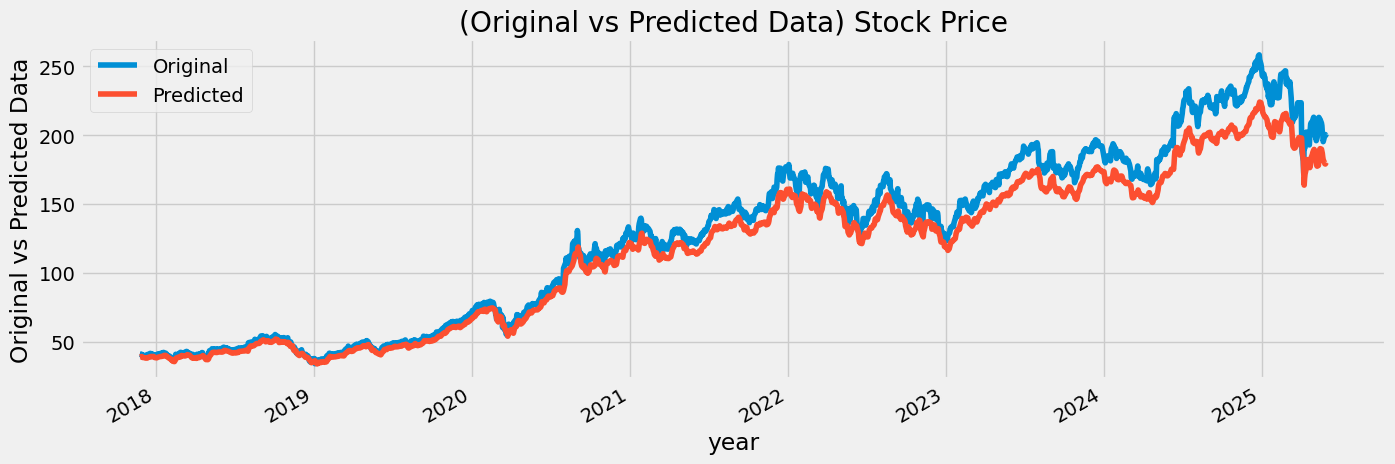

In [49]:
plt_graph((15, 5), plotting_data, "Original vs Predicted Data")

<Figure size 640x480 with 0 Axes>

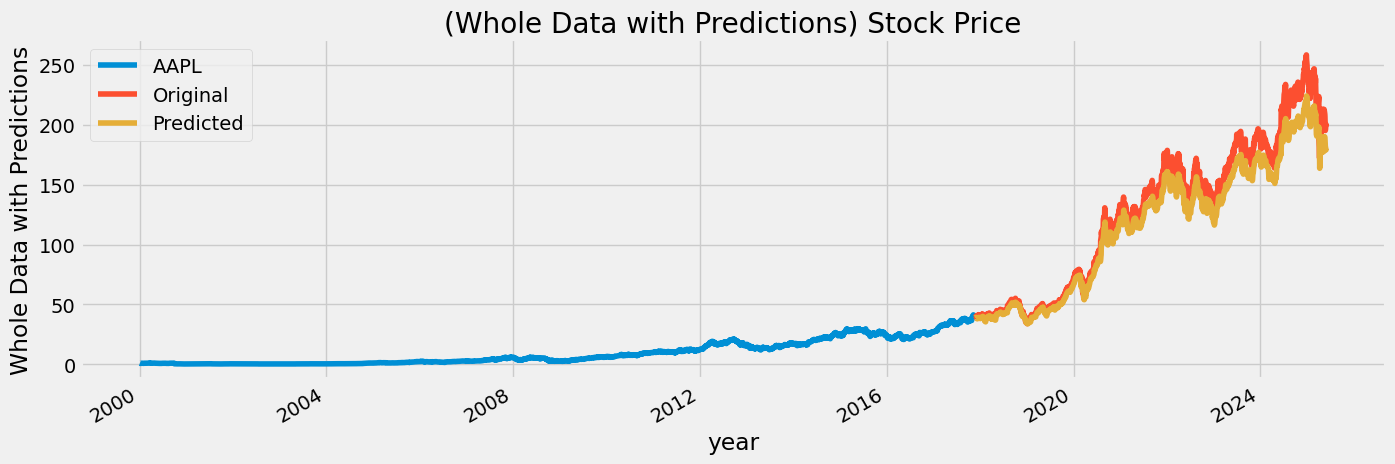

In [57]:
plt_graph((15, 5),pd.concat([Close[:splitting_len+100], plotting_data], axis=0), "Whole Data with Predictions")

In [59]:
model.save('stock/model.h5')

In [61]:
import pickle

with open('stock/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('stock/predictions.pkl', 'wb') as f:
    pickle.dump({
        'inv_predictions': inv_predictions,
        'inv_y_test': inv_y_test,
        'plotting_data': plotting_data
    }, f)


In [62]:
import os
os.makedirs('stock', exist_ok=True)

In [63]:
model.save('stock/model.h5')
print("Model saved successfully!")

Model saved successfully!


In [64]:
import joblib
joblib.dump(scaler, 'stock/scaler.pkl')
print("Scaler saved successfully!")

Scaler saved successfully!
